In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

load the csv

In [5]:
raw_data = pd.read_csv("players_20.csv")

clean the data

split the data into goal keepers and non-goal keepers

In [71]:
#create an array of all the rows missing the shooting value
has_nan_shooting_mask = raw_data['shooting'].isna()

0        False
1        False
2        False
3         True
4        False
         ...  
18273    False
18274    False
18275    False
18276    False
18277    False
Name: shooting, Length: 18278, dtype: bool

In [87]:
#create a new dataframe with all the rows missing shooting
gk_df = raw_data[has_nan_shooting_mask]

#create a new dataframe with all the rows not missing shooting
not_gk_df = raw_data[~has_nan_shooting_mask]

In [88]:
#drop any empty rows and columns
gk_df = gk_df.dropna(how='all', axis=1)
not_gk_df = not_gk_df.dropna(how='all', axis=1)

In [89]:
gk_df = gk_df.dropna(how="all", axis=0)
not_gk_df = not_gk_df.dropna(how="all", axis=0)

see if there are any missing rows

In [90]:
if(raw_data.shape[0] == gk_df.shape[0] + not_gk_df.shape[0]):
    print("no rows lost")
else:
    print("rows lost")

no rows lost


see if there are any unacounted for columns

In [91]:
#get the column names
columns1 = set(gk_df.columns)
columns2 = set(not_gk_df.columns)

#get all the shared columns
common_columns = columns1.intersection(columns2)

#check if all the columns - the common columns equals the total number of columns
if(len(gk_df.columns) + len(not_gk_df.columns) - len(common_columns) == raw_data.shape[1]):
    print("all columns accounted for")
else:
    print("some columns lost")

all columns accounted for


None of the rows or columns were invalidated. The original data is still valid. Though, it would be better to use the split dataframes for visualization purposes.

    • Load the csv file and show top 5 records from it

In [14]:
df = raw_data
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


  • How you would be able to see each column's name

In [15]:
def print_in_rows(list_to_print: list, len_of_rows: int):
    """prints a given list in rows of a given length

    Args:
        list_to_print (list): the list to be printed
        len_of_rows (int): the length of the rows. Must be a positive integer
        name (str): The name of the rows
    """
    for i in range(0, len(list_to_print), len_of_rows):
        print(f"row {int(1+ (i/len_of_rows))}", end = " | ")
        print(list_to_print[i:i+len_of_rows], end = "\n\n")

In [16]:
print_in_rows(list(df.columns), 10)


row 1 | ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club']

row 2 | ['overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate']

row 3 | ['body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position']

row 4 | ['nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking']

row 5 | ['gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling']

row 6 | ['skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_r

    • Show the number of rows and columns in the dataset

In [17]:
print(f"The number of rows in the original dataset is {df.shape[0]}")
print(f"The number of columns in the original dataset is {df.shape[1]}")


The number of rows in the original dataset is 18278
The number of columns in the original dataset is 104


    • Show the number of players in each country

In [27]:
#grab the nationality column and count the values in it
player_count_by_country = pd.DataFrame(df["nationality"].value_counts())

#rename the column
player_count_by_country = player_count_by_country.rename(columns={'nationality': 'player_count'})
player_count_by_country

,player_count
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
...,...
Liberia,1
São Tomé & Príncipe,1
Puerto Rico,1
Bahrain,1


    • Show the top 10 countries with the highest amount of players

In [34]:
#sort by player count and show the top 10 rows
player_count_by_country = player_count_by_country.sort_values(by="player_count", ascending=False)
player_count_by_country.head(10)

,player_count
England,1667
Germany,1216
Spain,1035
France,984
Argentina,886
Brazil,824
Italy,732
Colombia,591
Japan,453
Netherlands,416


    • Create a bar plot of the top 5 countries with the highest number of players, and fill the bars in green

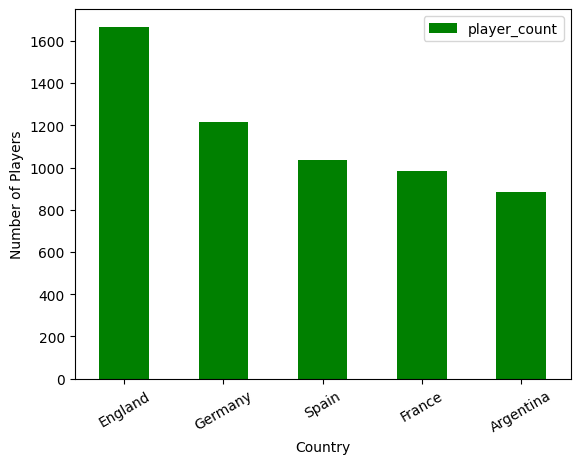

In [39]:
#grab the top 5 rows
top_five = player_count_by_country.head(5)

# create a bar plot of the top 5 countries
#don't need to specify x and y because there is only 1 data coulmn and 1 index column
ax = top_five.plot.bar(color='green')

#rotate the xticks by 30 degrees to make it more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# set the x-axis label
ax.set_xlabel('Country')

# set the y-axis label
ax.set_ylabel('Number of Players')

# show the plot
plt.show()

    • Display the short name and wages for the top 5 players

In [41]:
#sort by overall
df = df.sort_values(by="overall", ascending=False)
df.head(5)[["short_name", "wage_eur"]]


,short_name,wage_eur
0,L. Messi,565000
1,Cristiano Ronaldo,405000
2,Neymar Jr,290000
3,J. Oblak,125000
4,E. Hazard,470000


    • Display the short name and wages for the top 5 players with the highest salaries

In [42]:
#sort by wage
df = df.sort_values(by="wage_eur", ascending=False)
df.head(5)[["short_name", "wage_eur"]]


,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


    • Create a bar plot of the previous bullet point

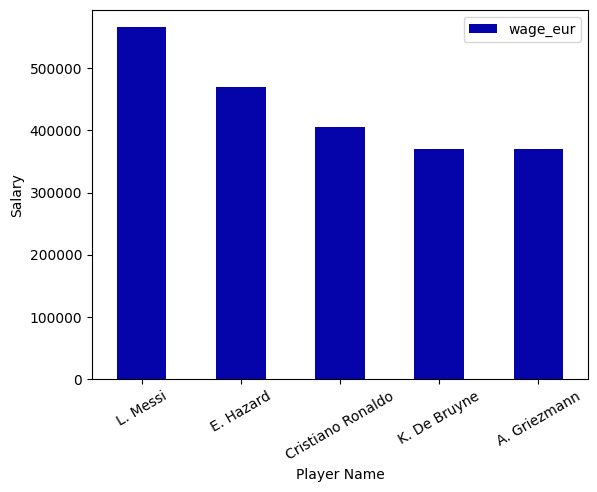

In [54]:
#create a dataframe with just the short names and wages
player_name_and_wage = df.head(5)[["short_name", "wage_eur"]]

#set the short names to be the index
player_name_and_wage = player_name_and_wage.set_index("short_name")

# create a bar plot of the top 5 highest paid players
#don't need to specify x and y because there is only 1 data coulmn and 1 index column
#set the color to royal blue
ax = player_name_and_wage.plot.bar(color="#0504aa")

#rotate the xticks by 30 degrees to make it more readable
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# set the x-axis label
ax.set_xlabel('Player Name')

# set the y-axis label
ax.set_ylabel('Salary')

# show the plot
plt.show()

    • Show top 10 records for Germany

In [57]:
german_players = df.loc[df['nationality'] =='Germany']
german_players = german_players.sort_values(by="overall", ascending=False)
german_players.head(10)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,...,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
31,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,...,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
49,178603,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,...,77+3,83+3,83+3,83+3,77+3,78+3,84+3,84+3,84+3,78+3
70,189596,https://sofifa.com/player/189596/thomas-muller...,T. Müller,Thomas Müller,29,1989-09-13,186,75,Germany,FC Bayern München,...,69+3,68+3,68+3,68+3,69+3,67+3,62+3,62+3,62+3,67+3
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
61,212622,https://sofifa.com/player/212622/joshua-kimmic...,J. Kimmich,Joshua Kimmich,24,1995-02-08,176,73,Germany,FC Bayern München,...,83+3,82+3,82+3,82+3,83+3,81+3,78+3,78+3,78+3,81+3
77,212190,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,1995-09-03,195,97,Germany,FC Bayern München,...,71+2,77+2,77+2,77+2,71+2,75+2,83+2,83+2,83+2,75+2
118,212194,https://sofifa.com/player/212194/julian-brandt...,J. Brandt,Julian Brandt,23,1996-05-02,185,83,Germany,Borussia Dortmund,...,64+2,63+2,63+2,63+2,64+2,60+2,51+2,51+2,51+2,60+2


    • Show the top 5 records of Germany players who have a maximum height, weight and wage

In [59]:
#sort german players by height weight and wage
german_players.sort_values(by=["height_cm", "weight_kg", "wage_eur"], ascending=False).head(5)[["short_name", "height_cm", "weight_kg", "wage_eur"]]

,short_name,height_cm,weight_kg,wage_eur
8016,A. Seydel,199,90,9000
1389,L. Unnerstall,198,103,14000
1217,M. Esser,198,97,23000
13576,L. Watkowiak,197,103,2000
518,R. Fährmann,197,98,43000


    • Display the short name and wages of the top 5 Germany players

In [60]:
#sort german players by overall. Show only their short name and wage
german_players.sort_values(by=["overall"], ascending=False).head(5)[["short_name", "wage_eur"]]

,short_name,wage_eur
6,M. ter Stegen,250000
31,M. Neuer,155000
36,T. Kroos,330000
37,M. Reus,170000
49,M. Hummels,130000


    • Show top 5 players who have the best shooting skills among all the players with short names

In [62]:
#prompt inplies there might be some players missing short names
#check if there are any players missing short names
df["short_name"].isna().sum()

0

In [66]:
#no missing short names, sort by shooting
df.sort_values(by="shooting", ascending=False).head()[["short_name", "shooting"]]

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
12,H. Kane,91.0
17,S. Agüero,90.0
19,L. Suárez,89.0


    • Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills

In [67]:
#sort by defending and grab the right columns
df.sort_values(by="defending", ascending=False).head()[["short_name", "defending", "nationality", "club"]]

,short_name,defending,nationality,club
16,G. Chiellini,90.0,Italy,Juventus
7,V. van Dijk,90.0,Netherlands,Liverpool
49,M. Hummels,89.0,Germany,Borussia Dortmund
11,K. Koulibaly,89.0,Senegal,Napoli
35,D. Godín,89.0,Uruguay,Inter


    • Show wage records of the top 5 players of the 'Real Madrid' team
    • Show shooting records of top 5 players of 'Real Madrid' team
    • Show defending records of top 5 players of 'Real Madrid' team
    • Show nationality records of top 5 players of 'Real Madrid' team

In [70]:
real_madrid = df.loc[df["club"] == "Real Madrid"]
real_madrid.sort_values(by="overall", ascending = False).head()[["short_name", "wage_eur", "shooting", "defending", "nationality"]]

,short_name,wage_eur,shooting,defending,nationality
4,E. Hazard,470000,83.0,35.0,Belgium
8,L. Modrić,340000,76.0,72.0,Croatia
18,Sergio Ramos,300000,68.0,87.0,Spain
36,T. Kroos,330000,80.0,70.0,Germany
28,T. Courtois,235000,NaN,NaN,Belgium


Extentions

/tmp/ipykernel_4427/1411184605.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  not_gk_df_corr = ngkdf.corr()


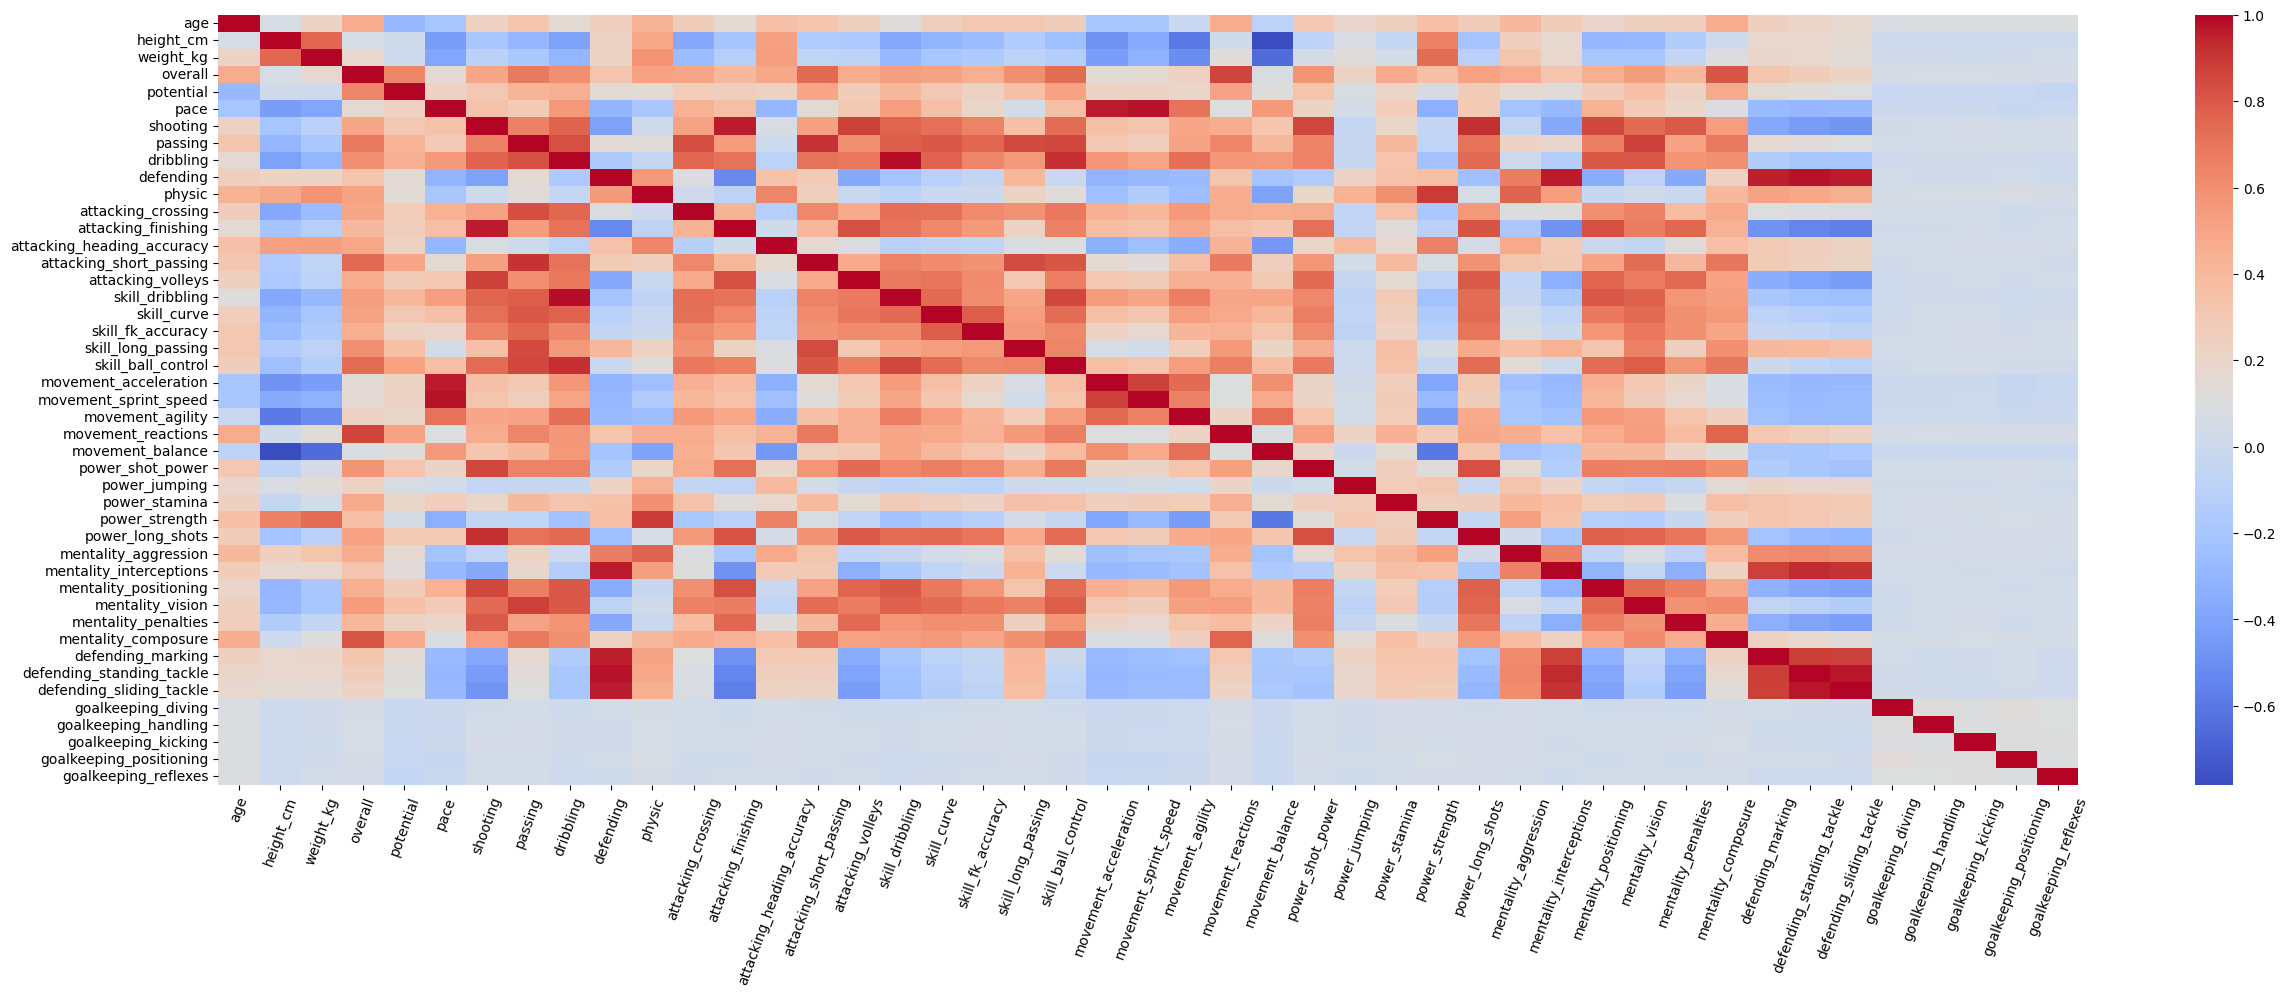

In [126]:
#create a new dataframe with a few columns dropped
ngkdf = not_gk_df.drop(["sofifa_id", "contract_valid_until", "international_reputation", "weak_foot", "skill_moves", "team_jersey_number", "nation_jersey_number", "wage_eur", "release_clause_eur", "value_eur"], axis=1)

#create a correlation matrix
not_gk_df_corr = ngkdf.corr()

#set the ax size
fig, ax = plt.subplots(figsize=(30, 10)) 

#create the heatmap
sns.heatmap(not_gk_df_corr, cmap="coolwarm", ax=ax)

#rotate the xticklables a bit. If I rotate them too much, they will start to overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

#show the plot
plt.show()

/tmp/ipykernel_4427/1525517912.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  gk_df_corr = gkdf.corr()


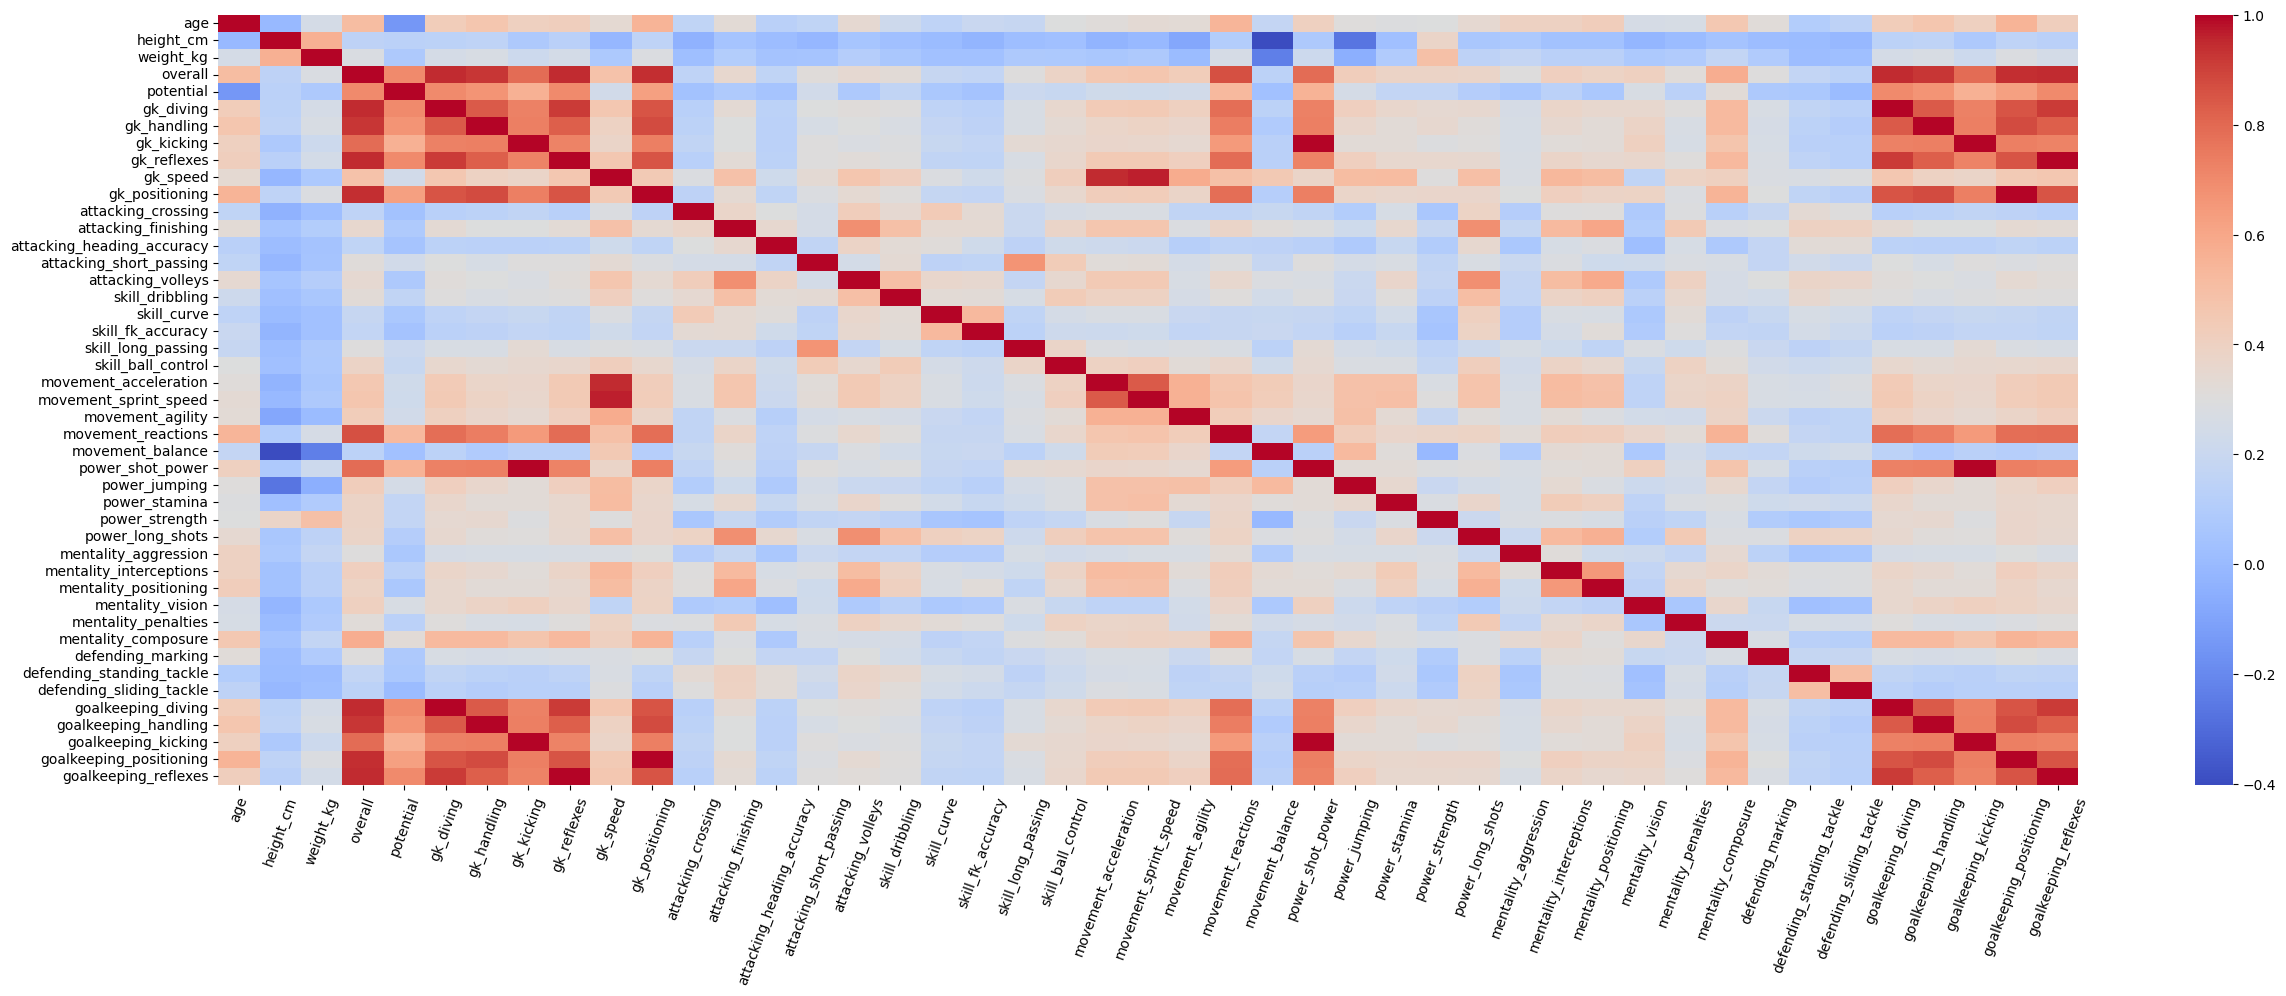

In [128]:
#create a new dataframe with a few columns dropped
gkdf = gk_df.drop(["sofifa_id", "contract_valid_until", "international_reputation", "weak_foot", "skill_moves", "team_jersey_number", "nation_jersey_number", "wage_eur", "release_clause_eur", "value_eur"], axis=1)

#create a correlation matrix
gk_df_corr = gkdf.corr()

#set the ax size
fig, ax = plt.subplots(figsize=(30, 10)) 

#create the heatmap
sns.heatmap(gk_df_corr, cmap="coolwarm", ax=ax)

#rotate the xticklables a bit. If I rotate them too much, they will start to overlap
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

#show the plot
plt.show()